In [2]:
pip install pandas numpy matplotlib seaborn


  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl (11.3 MB)
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   -- -----------------

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


In [5]:
path = r"C:\Users\abdul\Desktop\mlopsproject\data\processed\eval\manual_fedavg_test_predictions.csv"
df = pd.read_csv(path)
df.head()


,HeartRate,Temp,PM25,NO2,CO_Level,Label,PredLabel
0,0.564211,0.337203,0.011423,1.067509,-0.127623,1,1
1,0.579555,0.665897,-2.775670,5.746141,1.293919,1,1
2,0.798125,0.488985,0.561998,-6.849346,-0.301815,0,0
3,0.402976,0.055048,-8.376359,3.289473,-1.256286,0,0
4,0.780505,0.004299,-6.474262,-6.853775,1.044768,0,0


In [6]:
df.columns


Index(['HeartRate', 'Temp', 'PM25', 'NO2', 'CO_Level', 'Label', 'PredLabel'], dtype='object')

In [7]:
df.describe()


,HeartRate,Temp,PM25,NO2,CO_Level,Label,PredLabel
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.534219,0.592525,0.493299,-0.543690,0.149949,1.000000,0.990196
std,0.162177,0.268755,5.192174,2.857775,0.901194,0.820529,0.838375
min,0.127704,0.004299,-9.343799,-6.853775,-2.089308,0.000000,0.000000
25%,0.444798,0.408139,-3.502090,-2.515877,-0.471137,0.000000,0.000000
50%,0.537198,0.652010,0.634030,-0.657359,0.242331,1.000000,1.000000
75%,0.621259,0.821657,4.342470,1.531110,0.910716,2.000000,2.000000
max,1.000000,0.965933,11.941549,5.746141,2.227373,2.000000,2.000000


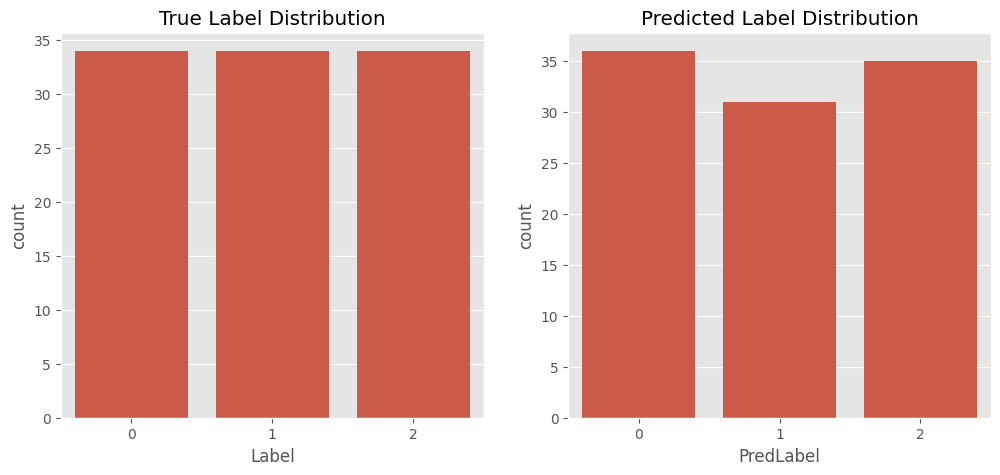

In [8]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x=df["Label"], ax=ax[0])
ax[0].set_title("True Label Distribution")

sns.countplot(x=df["PredLabel"], ax=ax[1])
ax[1].set_title("Predicted Label Distribution")

plt.show()


In [10]:
pip install scikit-learn seaborn


  Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl (8.9 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl (38.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


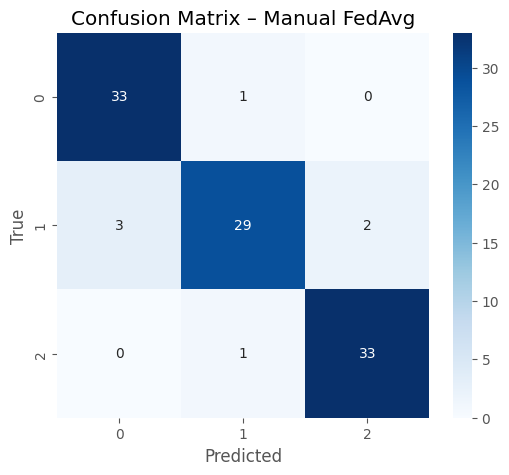

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df["Label"], df["PredLabel"])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            cmap="Blues",
            xticklabels=[0,1,2],
            yticklabels=[0,1,2])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Manual FedAvg")
plt.show()


C:\Users\abdul\AppData\Local\Temp\ipykernel_2256\2859528473.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Label", y="PM25", data=df, palette="Set2")


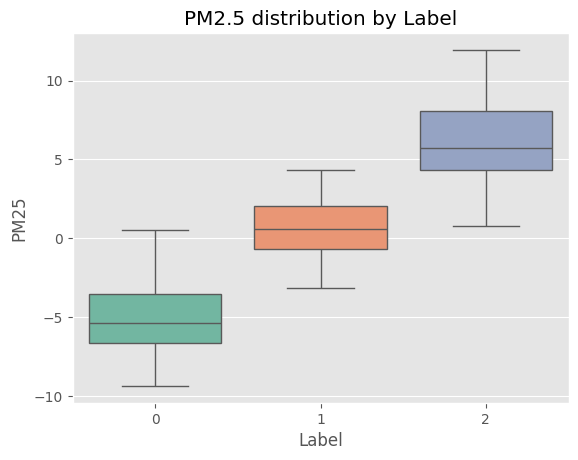

In [12]:
sns.boxplot(x="Label", y="PM25", data=df, palette="Set2")
plt.title("PM2.5 distribution by Label")
plt.show()


In [13]:
errors = df[df["Label"] != df["PredLabel"]]
errors.head()


,HeartRate,Temp,PM25,NO2,CO_Level,Label,PredLabel
12,0.251288,0.571273,-3.537724,4.224409,-1.488444,0,1
21,0.430844,0.693284,2.673160,-1.987225,1.034399,2,1
24,0.612067,0.190475,-1.390201,-0.771274,1.588143,1,0
26,0.493425,0.122566,-2.782957,1.579635,1.251058,1,0
49,0.683596,0.004717,-0.707744,-1.317689,-0.364818,1,0
